초판 2쇄 수정사항 
1. [연도별 OPS 중앙값 그래프 수정](#m1)
2. [연도별 팀 OPS](#m2)
3. [연도별 월 평균 타율](#m3)
4. [7월 일별 경기수 합](#m4)
5. [나이별 평균 성적](#m5)

# 각주 모음

# 1. KBO 타자 OPS 예측
## 1.2. 탐색적 데이터 분석

In [4]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

1. 필요 라이브러리 로드
matplotlib(font_manager, rc), matplotlib, matplotlib.pyplot(plt), seaborn(sns)
, pandas(pd), numpy(np), platform

2. 윈도우인 경우 맑은 고딕 폰트 이용("c:/Windows/Fonts/malgun.ttf")

3. 그래프에서 마이너스 기호가 표시되게 하는 설정입니다. matplotlib이용


### 1.2.1. 프리시즌 데이터 분석

In [5]:
# 데이터 위치 재설정
# 프리시즌 데이터 로드
preseason_df = pd.read_csv("C:/Users/lisa5\python_basic/Pre_Season_Batter.csv")
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("C:/Users/lisa5/python_basic/Regular_Season_Batter.csv")
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


## 데이터 위치 재설정
1. 프리시즌 데이터 로드("C:/Users/lisa5\python_basic/Pre_Season_Batter.csv")

2. 정규시즌 데이터 로드("C:/Users/lisa5/python_basic/Regular_Season_Batter.csv")

3. 프리시즌 데이터 크기 확인

4. 프리시즌 데이터 상단 출력


프리시즌 데이터 기초통계량 확인


In [8]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


1. 프리시즌 데이터 히스토그램 시각화


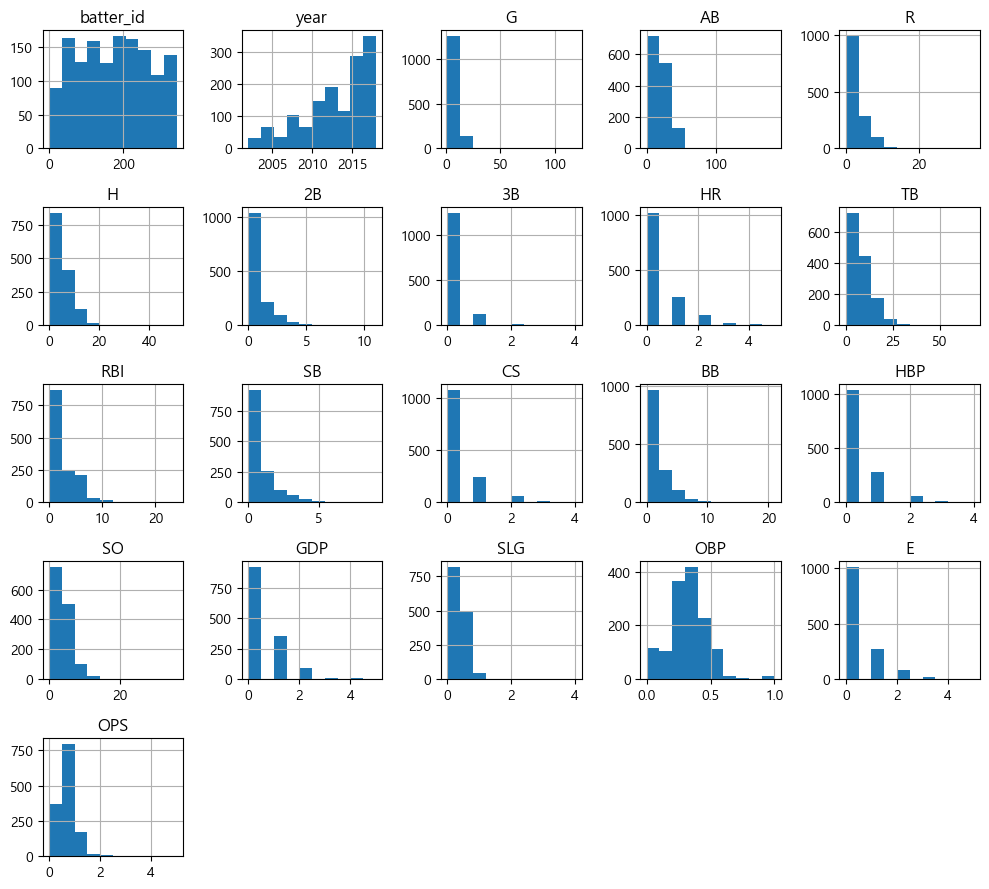

In [9]:
# 데이터 시각화
preseason_df.hist(figsize=(10,9)) # (가로, 세로)
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [11]:
# 1. 정규시즌 데이터에서 2002년 이후의 연도별(그룹화) 기록된 선수('batter_id')의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).transpose().loc[:,2002:] # 2002년부터 봅니다.

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


1. groupby()로 연도별 그룹화, count()fh []열의 카운트를 계산, 결과를 rename('')으로 저장한다. 
2. pd.concat([]) 데이터 프레임으로 연결, 3번째 행은 정규시즌/프리시즌을 소숫점 2번째 자리까지 반올림한것
3. transpose()로 데이터 프레임의 행과 열을 바꾸어 줌
4. loc[:,2002:] 모든 행의 2002년부터의 데이터

In [12]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + \
                               regular_season_df['year'].apply(str)
## 정규시즌의 이름과 연도(문자열로 반환) 열을 더해 새로운 인덱스를 생성
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']). \
                        intersection(preseason_df['new_idx']))
## set을 이용하여 집합으로 변환, intersection로 교집합을 구해줌

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy() # x는 new_idx값
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) 
## copy() 선택된 행들로 새로운 데이터 프레임 생성
## new_idx를 가지고 있는 데이터를 new_idx 열로 정렬하여 regular_season_new로 설정
## reset_index(drop=True) 이전 인덱스 삭제 새로운 인덱스부터 시작

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(
    lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx']) # 열간 비교, 같으면 t, 다르면 f,의 sum
## 공통된 new_idx 확인

(1358, 30) (1358, 30)


1358

In [13]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
## 정규시즌의 이름과 연도(문자열로 반환) 열을 더해 새로운 인덱스('new_idx')를 생성


## 프리시즌의 선수 이름과 연도 열을 더해 새로운 인덱스를 생성

# 정규시즌과 프리시즌의 새로운 인덱스('new_idx')의 공통된 값을 집합으로 추출하여 리스트로 변환하여 intersection_idx로 정의
## 즉, intersection_idx는 'new_idx' 열에서 regular_season_df와 preseason_df 모두에 포함된 값들로 구성된 리스트
## set을 이용하여 집합으로 변환, intersection로 교집합을 구해줌

# 교집합에 존재하는 데이터만 불러오기(regular_season_new)
## copy() 선택된 행들로 새로운 데이터 프레임 생성
## new_idx를 가지고 있는 데이터를 new_idx 열로 정렬하여 regular_season_new로 설정
## reset_index(drop=True) 이전 인덱스 삭제 새로운 인덱스부터 시작
## regular_season_new 데이터 프레임은 'new_idx' 열의 값이 intersection_idx 리스트에 포함된 행들로 이루어져 있으며, 
## 이 행들은 'new_idx' 값을 기준으로 정렬되어 새로운 인덱스가 부여
    
# 비교를 위해 인덱스로 정렬
# preseason_new 는 프리시즌 데이터에서 'new_idx' 열의 값들을 apply 함수를 사용하여 각 행에 대해 조건을 적용
# 조건은 lambda x: x in intersection_idx로 정의
# 조건을 만족하는 행들을 선택하고, copy() 함수를 사용하여 선택된 행들을 복사
# 선택된 행들을 'new_idx' 열을 기준으로 정렬합니다. 이를 위해 sort_values 함수를 사용
# reset_index(drop=True) 함수는 인덱스를 다시 설정하고, drop=True 옵션은 이전 인덱스를 제거하라는 의미
# regular_season_new와 preseason_new 데이터 프레임은 공통된 'new_idx' 값을 가지게 된다. 


# 검정 코드
## regular_season_new, preseason_new 형태 출력

## 정규시즌과 프리시즌에서 'new_idx' 열의 값이 일치하는 행의 개수를 계산
# 열간 비교, 같으면 t, 다르면 f,의 sum
## 공통된 new_idx 확인

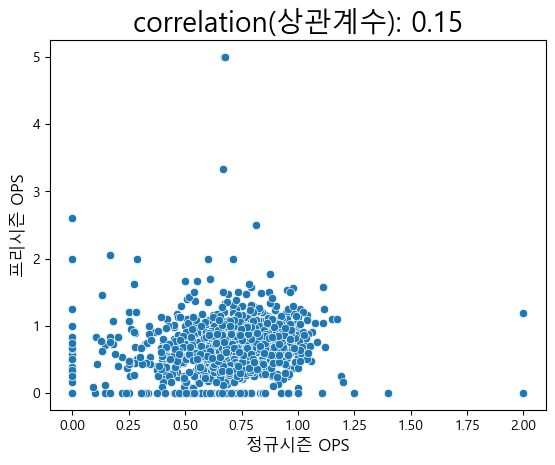

In [14]:
## 에러로 수정
import matplotlib.pyplot as plt  # matplotlib 패키지의 pyplot 모듈을 plt로 임포트
import seaborn as sns  # seaborn 패키지를 sns로 임포트

# 정규시즌과 프리시즌의 OPS(출루율+장타율) 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])

# seaborn 패키지의 scatterplot() 함수를 사용하여 산점도 그래프 생성
sns.scatterplot(x=regular_season_new['OPS'], y=preseason_new['OPS'])

# 그래프 제목 설정
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)

# x축 레이블 설정
plt.xlabel("정규시즌 OPS", fontsize=12)

# y축 레이블 설정
plt.ylabel("프리시즌 OPS", fontsize=12)

# 그래프 출력
plt.show()

### 1.2.2. 정규시즌 데이터 분석

In [15]:
# 정규시즌 데이터프레임의 크기(shape), 앞부분 데이터(head()), 요약 통계(describe()) 출력

display(regular_season_df.shape, regular_season_df.head(),regular_season_df.describe())
display(regular_season_df.shape)  # 데이터프레임의 행과 열의 개수를 출력
display(regular_season_df.head())  # 데이터프레임의 처음 5개 행을 출력
display(regular_season_df.describe())  # 데이터프레임의 요약 통계 정보를 출력

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


<a id='m1'>연도별 OPS 중앙값 그래프</a>

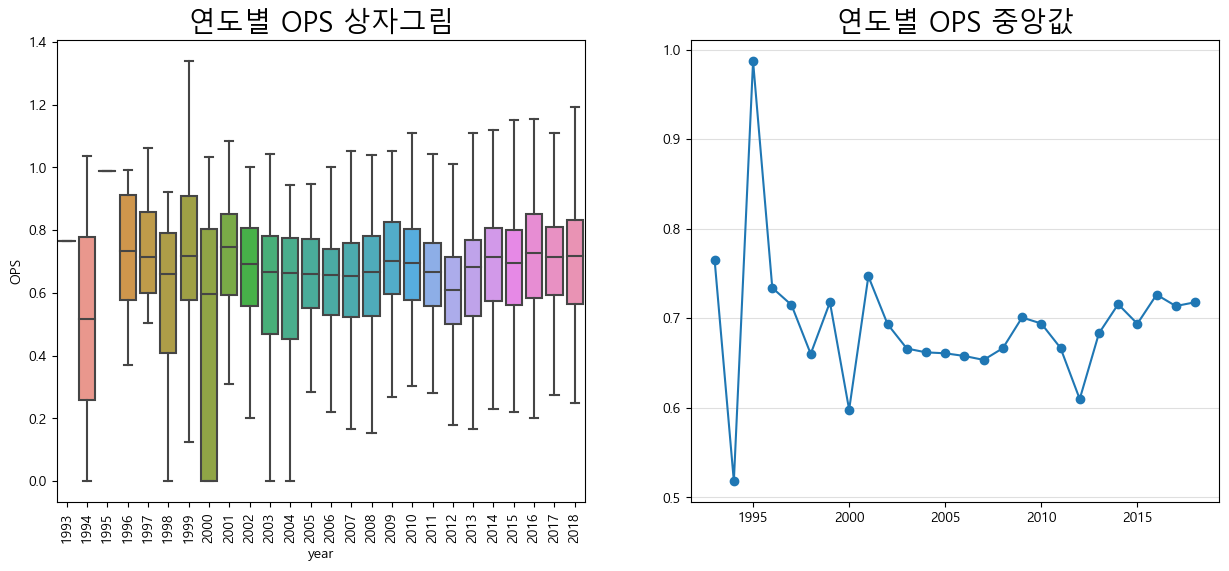

In [16]:
# 그래프 크기를 조정하고 두 개의 서브플롯(1행 2열)을 생성
plt.figure(figsize=(15,6))

# 첫 번째 서브플롯(1행 2열 중 1번째)에 상자 그림(boxplot)
plt.subplot(1,2,1)
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
## showfliers=False: 이상치를 표현하지 않음
g.set_title('연도별 OPS 상자그림', size = 20)  # 그래프 제목 설정
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # x축 레이블을 90도 회전하여 표시

# 두 번째 서브플롯(1행 2열 중 2번째)에 연도별 OPS 중앙값을 선 그래프로
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median(), marker='o')  # 중앙값 선 그래프 생성
plt.grid(axis='y', linestyle='-', alpha=0.4)  # y축 그리드 추가
plt.title('연도별 OPS 중앙값', size = 20)  # 그래프 제목 설정

# 그래프를 화면에 출력
plt.show()

In [17]:
pd.crosstab(regular_season_df['year'],'count').T # 전치
# 연도별 데이터 개수 계산

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


<a id='m2'>연도별 팀 OPS</a>

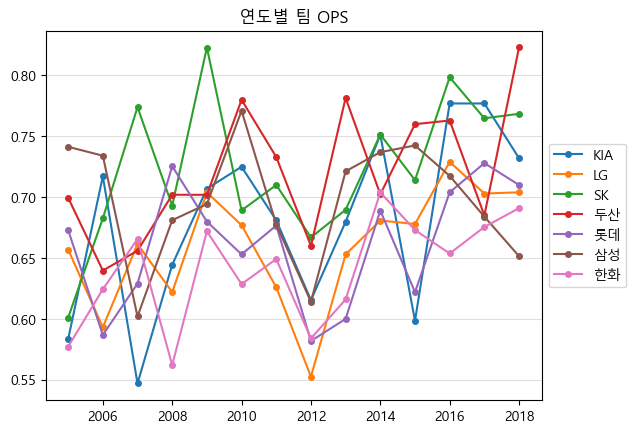

In [18]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')
# 위 코드는 regular_season_df 데이터프레임을 이용하여 각 연도별 팀의 OPS 중앙값을 계산하여 med_OPS_team에 저장

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0
# 이 코드는 2005년 이후에 결측치가 존재하지 않는 팀만을 선택하기 위한 조건을 설정하고, 선택된 팀들을 team_idx에 저장

plt.plot(med_OPS_team.loc[team_idx,2005:].T, marker='o', markersize=4)
# 이 코드는 선택된 팀들의 2005년 이후 OPS 중앙값 데이터를 전치시켜 선 그래프로 시각화

plt.grid(axis='y', linestyle='-', alpha=0.4)
# y축에 그리드를 추가하고, 그리드 선의 스타일과 투명도를 설정

plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns, loc='center left', bbox_to_anchor=(1, 0.5))
# 그래프 범례를 그래프의 왼쪽 중앙에 위치시키고, 범례 항목을 설정

plt.title('연도별 팀 OPS')
# 그래프의 제목을 설정

plt.show()
# 그래프를 화면에 출력

In [20]:
import re  # 정규표현식 모듈 임포트

# 'height/weight' 열에서 체중을 추출하여 'weight' 열에 저장
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)
## x.split('/')을 기준으로 문자열을 분할. 그리고 이 중 체중을 re.findall() 함수와 정규 표현식으로 추출.
## '\d+'는 하나 이상의 숫자를 의미.
## 만약 값이 결측치가 아니면 추출하고, 결측치이면 그대로 둔다.

# 'height/weight' 열에서 키를 추출하여 'height' 열에 저장
regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

# 첫 번째 행의 'height/weight', 'height', 'weight' 값을 출력
print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])
## 이 코드는 'height/weight' 열에서 키와 체중을 추출하여 'height'와 'weight' 열에 저장한 후, 첫 번째 행의 값을 출력

177cm/93kg 177.0 93.0


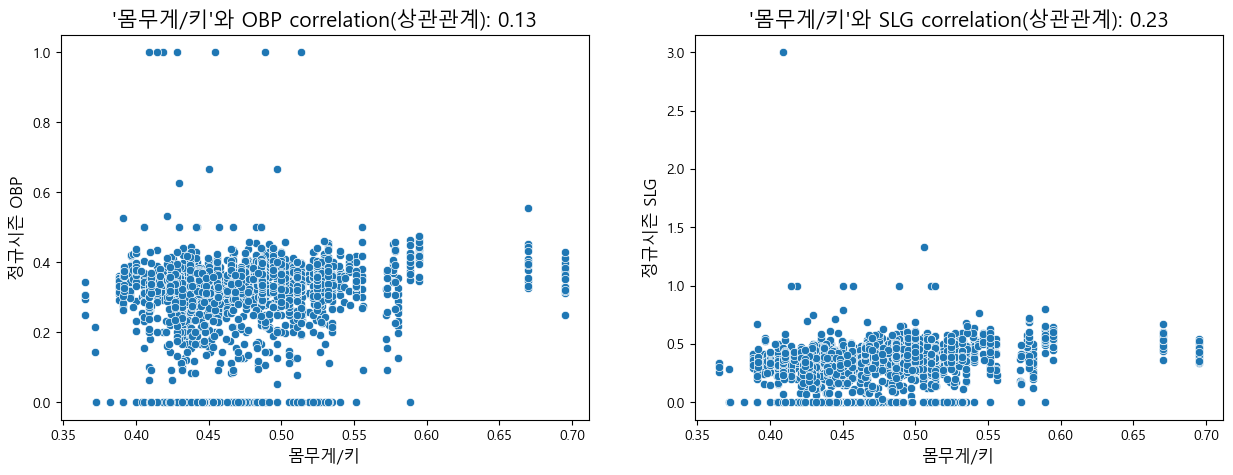

In [21]:
# 몸무게/키 계산
# 'weight' 열을 'height' 열로 나누어서 '몸무게/키' 비율을 계산하고 'weight_per_height' 열에 저장
regular_season_df['weight_per_height'] = regular_season_df['weight'] / \
                                         regular_season_df['height']

plt.figure(figsize=(15, 5)) # 그래프 크기 조정
plt.subplot(1, 2, 1) # 1행 2열의 첫 번째(1행, 1열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
# '몸무게/키'와 OBP 간 상관관계를 계산하고, 산점도 출력
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(x=regular_season_df['weight_per_height'], y=regular_season_df['OBP']) # 오류 수정
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 정규시즌과 프리시즌의 상관관계 계산
#  '몸무게/키'와 SLG 간 상관관계를 계산하고, 산점도 출력
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(x=regular_season_df['weight_per_height'], y=regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

In [22]:
regular_season_df['position'].value_counts()  # 정규시즌의 포지션 벨류 카운트

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [23]:
# position
regular_season_df['pos']=regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(  # 각 행에 적용
    lambda x: x[-3:-1] if pd.notnull(x) else x)  ##null이면 끝 두 문자 반환, 아니면 그대로 반환
print(regular_season_df['position'][0], regular_season_df['pos'][0], 
      regular_season_df['hit_way'][0]) # 지정된 열의 첫 번째 행 출력

# 'position' 열을 기반으로 'pos'와 'hit_way' 열 생성

# 'position' 열에서 괄호 이전 부분을 추출하여 'pos' 열에 저장. 결측치는 그대로 유지.
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 'position' 열에서 끝 두 문자를 추출하여 'hit_way' 열에 저장. 결측치는 그대로 유지.
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)

# 첫 번째 행의 'position', 'pos', 'hit_way' 값을 출력.
print(regular_season_df['position'][0], regular_season_df['pos'][0], 
      regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타
내야수(우투우타) 내야수 우타


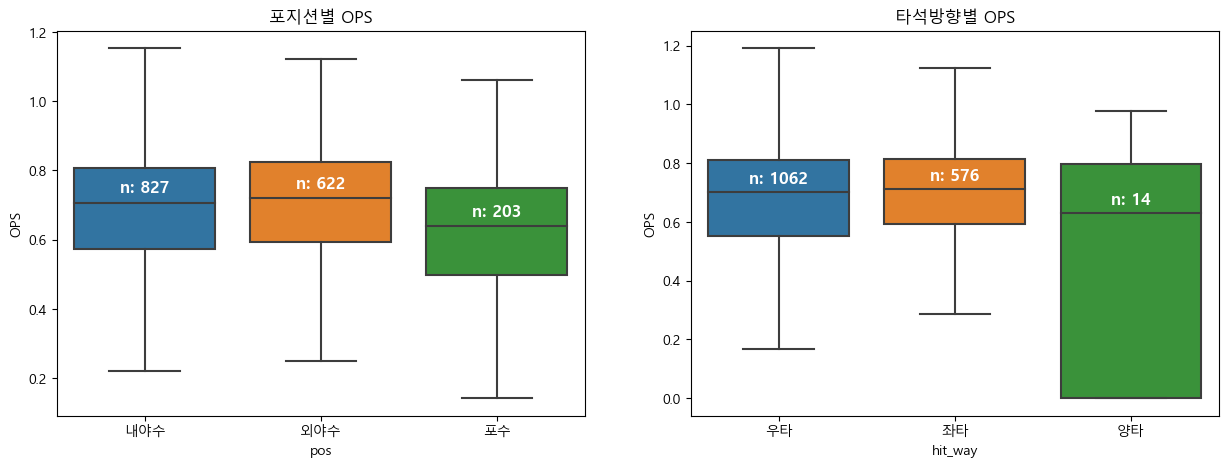

In [24]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)

# position 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()
##  to_dict()  Series 객체를 딕셔너리로 변환


# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key]) # 기존 값에 n을 더해 문자열로 변환하고 다시 할당
    
# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
## ax.get_xticklabels()에서 반환된 객체 리스트의 각 항목에 대해 'get_text()'를 불러와 새로운 리스트에 저장


# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), # 텍스트 값을 해당 인덱스를 불러옴
            medians[label.get_text()] + 0.03, nobs[label.get_text()], # nobs에서 현재 레이블에 해당하는 값을 불러옴
            horizontalalignment='center', size='large', color='w', weight='semibold')  # 중앙정렬

    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

In [25]:
regular_season_df['career'].head() # 정규시즌의 커리어 처음 5개만 출력

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [26]:
# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

# 'career' 열을 분할하여 외국 출신 선수 목록 추출

# 'career' 열의 '-' 문자를 공백으로 대체하고, 공백을 기준으로 분할하여 첫 번째 요소를 추출
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])

# 중복을 제거하고 '초'라는 문자가 포함된 경우 결측치로 처리
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치인 'nan' 값을 제거
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']

# 외국 선수의 나라를 출력.
foreign_country_list

['네덜란드', '쿠바', '도미니카', '캐나다', '미국']

In [27]:
# 'country' 열 생성 및 국적 정보 할당
# 'foreign_country' 시리즈를 'country' 열에 할당
regular_season_df['country'] = foreign_country

# 'country' 열의 값을 조건에 따라 'foreign' 또는 'korean'으로 변경
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)  # 결측치인 경우 그대로 유지
                 else ('foreign' if x in foreign_country_list else 'korean'))

# 'country' 열을 선택하여 데이터프레임으로 반환하고, 처음 5개 행을 출력
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


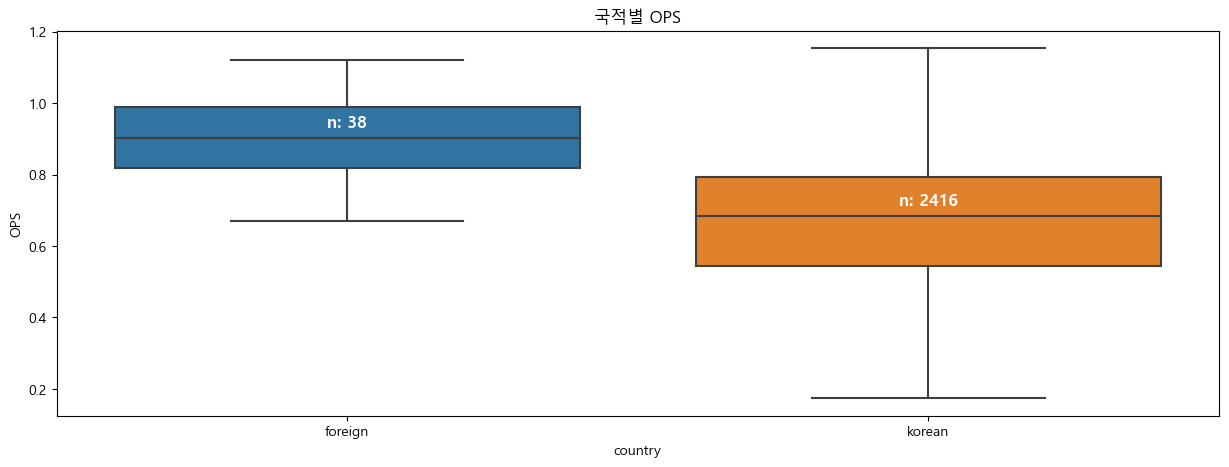

In [28]:
# 국적별 OPS를 시각화하는 코드
plt.figure(figsize=(15, 5))  # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data=regular_season_df, showfliers=False)  # 이상치 숨김

# 내외국인 별 OPS 중앙값을 저장하는 딕셔너리 생성
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수를 저장하는 딕셔너리 생성
nobs = regular_season_df['country'].value_counts().to_dict()
# 딕셔너리의 값에 'n:'을 추가하여 'n: 값' 형식으로 변환
for key in nobs:
    nobs[key] = "n: " + str(nobs[key])
# 그래프의 Xticks의 text 값을 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
# 각 국적별 중앙값과 관측치 수를 그래프에 표시
for label in ax.get_xticklabels():  # tick은 tick의 위치, label은 그에 해당하는 text 값
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()],  # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold')

ax.set_title('국적별 OPS')  # 그래프 제목 설정
plt.show()

In [29]:
regular_season_df['starting_salary'].value_counts()  # 정규시즌의 'starting_salary' 벨류 카운트

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

C:\Users\lisa5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lisa5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


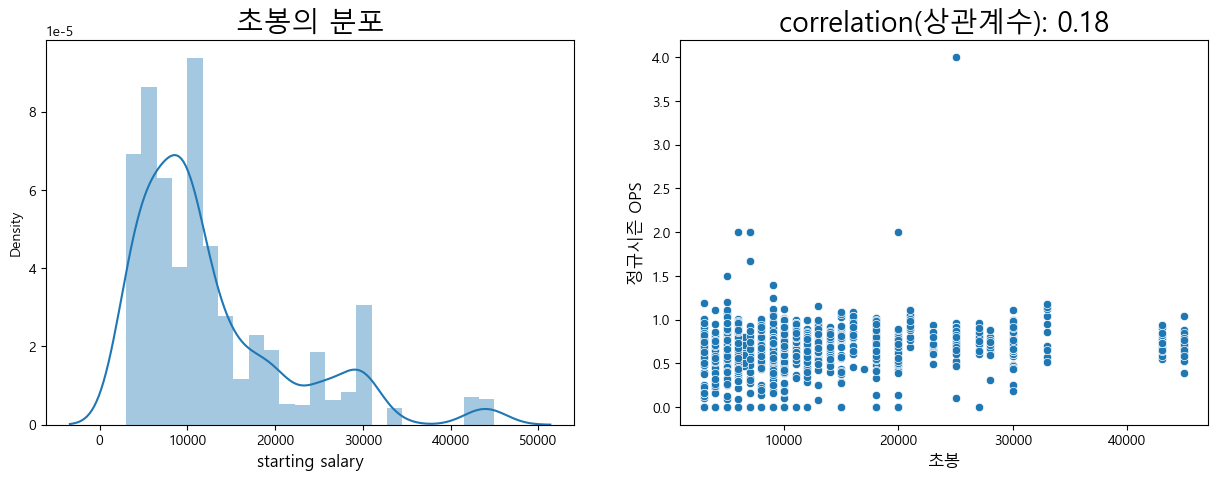

In [30]:

# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                 else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
b=sns.distplot(regular_season_df['starting_salary']. \
               loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

### 1.2.3. 일별 데이터 분석

In [31]:
# 'day_by_day_df' 데이터프레임을 CSV 파일에서 불러오기
# CSV 파일 경로를 지정하여 'day_by_day_df' 데이터프레임을 불러온다.
day_by_day_df = pd.read_csv("C:/Users/lisa5/python_basic/Regular_Season_Batter_Day_by_Day_b4.csv")

# 데이터프레임의 크기(shape)와 처음 5개 행을 출력
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [32]:
# 날짜(date)를 ‘.’을 기준으로 나누고 첫 번째 값을 월(month)로 지정 
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index() # 그룹화 후 결과를 새로운 데이터프레임으로 만들고 인덱스 재설정

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns='year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


<a id='m3'>연도별 월 평균 타율</a>

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


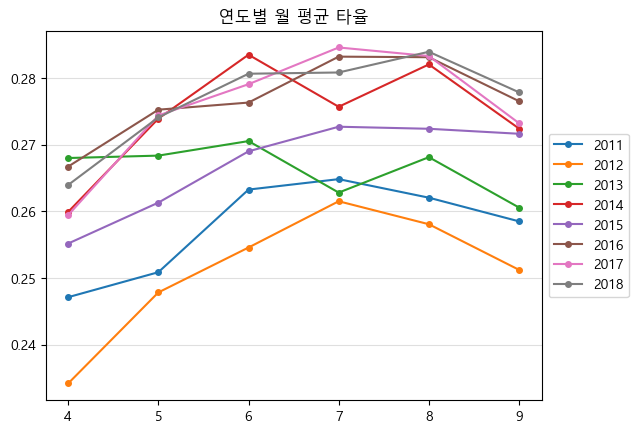

In [33]:
# 'agg_df' 데이터프레임의 일부 데이터를 시각화하고 설명
# 'agg_df' 데이터프레임에서 3번째 행(인덱스 2)부터 11번째 열(인덱스 10)부터 끝까지의 데이터를 출력
display(agg_df.iloc[2:, 10:])

# 2011~2018년 데이터만 이용하여 월 평균 타율을 그래프로 시각화
plt.plot(agg_df.iloc[2:, 10:], marker='o', markersize=4)  # 2011~2018년 데이터만 이용
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(agg_df.iloc[2:, 10:].columns,
           loc='center left', bbox_to_anchor=(1, 0.5))  # 그래프 범례를 그래프 밖에 위치시킴
plt.title('연도별 월 평균 타율')  # 그래프 제목 설정
plt.show()

## 1.3. 데이터 전처리

In [34]:
# 결측치 개수를 계산하여 데이터프레임으로 변환
# regular_season_df의 각 열(column)별로 결측치(누락된 데이터) 개수를 계산
# 그 결과를 시리즈로 얻고, 이를 다시 데이터프레임으로 변환
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,0,1076,26,0,802,802,802,802,802,0


In [35]:
# 수치형 타입의 변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # 모든 numeric(수치형) 타입
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0,num_cols].head()
## .isna().sum(axis=1) 각 행별로 결측치 개수 계산, 하나 이상 결측치를 포함하는 행을 선택하여 필터링하여 표시

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [87]:
# 수치형 변수에 포함되는 데이터 타입 선정
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \  ## 숫자형 선택
    regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0) ## 결측치 0으로 채우기

regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,0.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,0.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,0.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,0.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,0.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,0.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,0.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,0.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


In [37]:
# 일별 데이터에서 결측치를 0으로 채우는 코드
# 'day_by_day_df' 데이터프레임에서 수치형 열만 선택하여 결측치를 0으로 
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = \
    day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)

# 결측치를 0으로 채운 데이터프레임 출력
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [38]:
# 같은 방식으로 프리시즌 데이터에서 결측치를 0으로 채우기
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = \
    preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


In [39]:
# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,
                      not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,new_idx,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2005,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2006,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2007,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2008,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2011,NaN,NaN,korean


In [40]:
# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
    # 안타가 0개 이상이면서 장타율이 0인 경우
    ((regular_season_df['H'] > 0) & (regular_season_df['SLG']==0)) |
        
    # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서
    # 출루율이 0인 경우
    (((regular_season_df['H'] > 0) |
      (regular_season_df['BB'] > 0) |
      (regular_season_df['HBP'] > 0)) &
     (regular_season_df['OBP'] == 0))
].index         

# 데이터 삭제
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True) ## drop_idx에 지정된 행을 삭제, 데이터 프레임의 인덱스 재설정
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


### 1.3.2. 규정 타수 정의

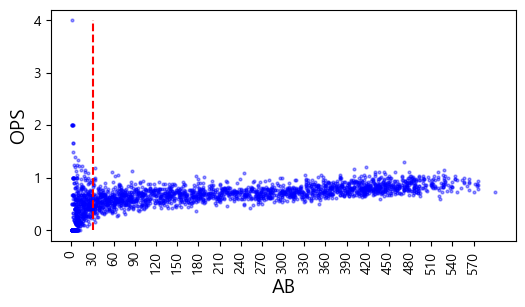

In [41]:
# AB와 OPS 관계를 시각화하는 코드
plt.figure(figsize=(6, 3))  # 그래프 크기를 조정
# 'AB'와 'OPS' 사이의 관계를 점으로 나타내고, 스타일과 마커 설정을 적용
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o', 
         markersize=2, color='blue', alpha=0.4)

# x축과 y축의 라벨을 설정
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)

# x축 눈금을 설정하고 30 단위로 눈금을 표시하며 90도 회전
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)),
           rotation=90)

# 수직 선을 그어서 x=30 지점을 강조
plt.vlines(30, ymin=min(regular_season_df['OPS']), ymax=max(regular_season_df['OPS']),
           linestyles='dashed', colors='r')

# 그래프를 출력
plt.show()

In [42]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25) # 하위 255 지점
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

# 실제 OPS 이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |  # 이상치 조건
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(  # ab열을 기준으로 내림차순 정렬
    by=['AB'], axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
793,박병호,400,2018,1.175000
1318,유재신,33,2018,1.192000
2351,한승택,33,2013,0.165000
416,김원섭,25,2005,0.116923
610,나주환,23,2013,0.174000
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000


<a id='m4'>7월 일별 경기수 합</a>

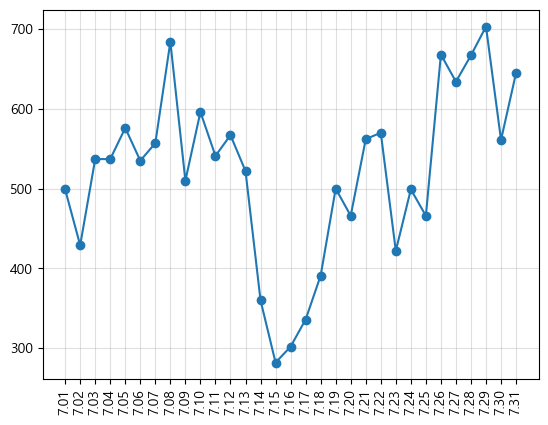

In [43]:
# 7.01~7.31 사이의 숫자를 생성하고 반올림하여 눈금 설정 및 7월 데이터 시각화
# 7.01부터 7.31까지 31일 간격으로 숫자를 생성하고 소수점 두 자리까지 반올림
major_ticks = list(np.round(np.linspace(7.01, 7.31, 31), 2))

# 'day_by_day_df' 데이터프레임에서 7월 데이터만 선택하기 위한 조건을 설정.
july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8)  # 7월만 불러오는 조건

# 생성한 눈금과 7월 데이터의 일자별 발생 횟수를 그래프로 시각화
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')

# 그리드 라인을 그리고, 라인 스타일과 투명도를 설정
plt.grid(linestyle='-', alpha=0.4)

# x축 눈금을 생성한 눈금 값으로 설정하고 90도 회전
plt.xticks(major_ticks, rotation=90)

# 그래프를 출력
plt.show()

### 1.3.3. 시간 변수

In [51]:
# 시간 변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    df.reset_index(drop=True, inplace=True)
    # 시간변수 생성을 위한 빈 열 초기화
    df['lag' + str(past) + '_' + var_name] = np.nan
    df['lag' + str(past) + '_' + 'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0, (max(df.index) + 1)):
            # 현재 선수와 같은 이름, 지난 'past' 년도의 데이터 필터링
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & 
                         (df['year'] == df['year'][i] - past), col]
            # 과거 기록이 결측치가 아니라면 값을 할당
            if len(val) != 0:
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]

    # 30타수 미만인 경우 결측치 처리
    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis=1, inplace=True)

    return df

Args:
    - df: 시간변수를 생성할 데이터 프레임  
    - var_name: 시간변수 생성의 대상이 되는 변수 이름   
    - past: 몇 년 전의 성적을 생성할지 결정 (정수형)   
    
    Returns:   
    - 시간변수가 추가된 데이터 프레임

C:\Users\lisa5\AppData\Local\Temp\ipykernel_12836\3757078081.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

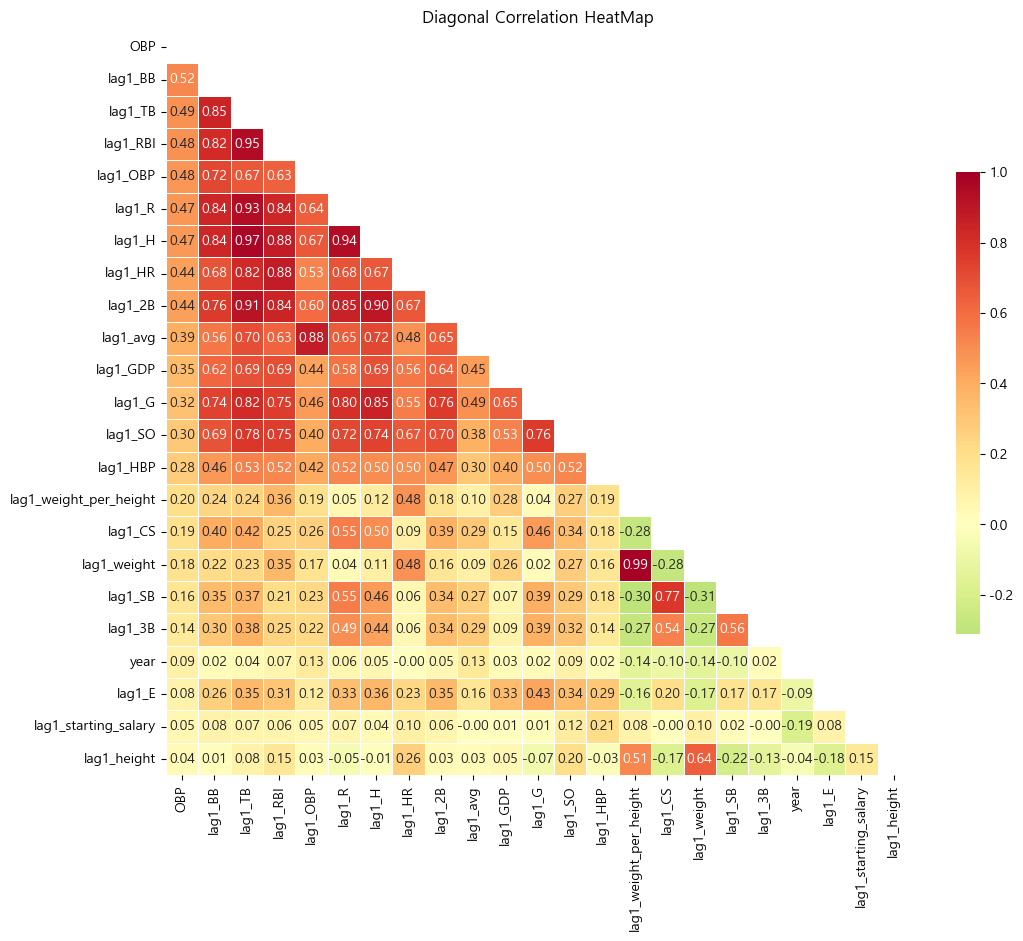

In [52]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# 숫자형 변수를 선택하고 특정 변수들을 제외한 컬럼을 numeric_cols로 저장
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id', 'year', 'OPS', 'SLG'], axis=1).columns)

# 'AB' 컬럼이 30 이상인 데이터만 선택
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

# 시간변수 생성 함수(lag_function)를 통해 각 지표별 1년 전 성적을 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

# 'OBP'를 제외한 다른 numeric 변수들을 삭제
numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis=1, inplace=True)

# 상관관계 행렬을 생성
corr_matrix = regular_season_temp.corr()

# 'OBP' 기준으로 상관관계를 내림차순으로 정렬
corr_matrix = corr_matrix.sort_values(by='OBP', axis=0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계 서브 플랏으로 나타내기
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object", "bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그리고 상관관계 값들을 주석으로 표시
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask,
                center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [53]:
# 희생 플라이(SF)를 계산하는 과정
# OBP(출루율) 계산 공식을 사용하여 SF(희생 플라이)를 계산
# (H + BB + HBP) / (OBP - (AB + BB + HBP))
regular_season_df['SF'] = (regular_season_df[['H', 'BB', 'HBP']].sum(axis=1) /
                           (regular_season_df['OBP'] - regular_season_df[['AB', 'BB', 'HBP']].sum(axis=1)))

# 계산 결과에 결측치가 있을 수 있으므로 결측치를 0으로 
regular_season_df['SF'].fillna(0, inplace=True)

# 계산된 SF를 반올림하여 정수형으로 변환
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x: round(x, 0))

# 한 타수당 평균 희생 플라이(SF_1)를 계산
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']

# 필요한 컬럼만 추출하여 새로운 데이터프레임을 생성.
regular_season_df_SF = regular_season_df[['batter_name', 'year', 'SF_1']]

In [44]:
#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','BB','HBP'].sum().reset_index()

#day_by_day와 regular season에서 구한 희생 플라이 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

#선수별 전반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis = 1, inplace = True)

#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
# OBP 결측치를 0으로 처리 
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


### 1.3.4. 추가 변수 생성

<a id='m5'>나이별 평균 성적</a>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


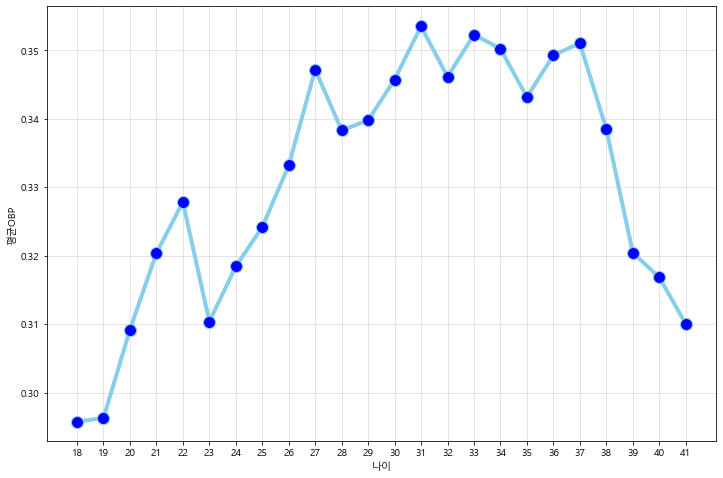

In [45]:
# 나이 변수 생성
regular_season_df['age'] = regular_season_df['year'] - \
                           regular_season_df['year_born'].apply(lambda x: int(x[:4]))

# 나이, 평균 출루율, 출루율 중위값으로 구성된 데이터프레임 구축
temp_df = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('age').agg(
    {'OBP':['mean','median']}).reset_index()
temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']

# 나이에 따른 출루율 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue',
         markersize=12, color='skyblue', linewidth=4)
plt.xticks(temp_df['age']) # 나이 표시
plt.grid(linestyle='-', alpha=0.4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

In [46]:
# 나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 3)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28,NaN,NaN,NaN


### 1.3.5. 데이터 사후 처리

In [47]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / \
      sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [48]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                            player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)

#2. 시즌별 OBP 평균
season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                              season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

#### player_OBP_mean(선수평균) 열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = \
    sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_hf_yr_OBP

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28,NaN,NaN,NaN,0.358779


In [49]:
# 결측치 처리하는 함수 정의
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    # data_Set: 이용할 데이터셋
    # var_name: 시간 변수를 만들 변수 이름
    # past: 몇 년 전 변수를 만들지 결정
    # season_var_name_mean_data season별로 var_name의 평균을 구한 데이터
  
    for i in range(0,len(data_set)):
        if np.isnan(data_set["lag"+str(past)+"_"+var_name][i]):
            data_set.loc[i,["lag"+str(past)+"_"+var_name]] = (
                data_set["mean" + "_" + var_name][i] + season_var_mean_data.loc[
                    season_var_mean_data['year'] == (data_set['year'][i] - past),
                    "mean_" + var_name].iloc[0]
                ) / 2
    return data_set

In [50]:
# 생성한 함수를 이용해 결측치 처리 진행
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 1, season_OBP_mean) # 1년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 2, season_OBP_mean) # 2년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 3, season_OBP_mean) # 3년 전 성적 대체
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,24,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,27,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28,0.363552,0.360760,0.363874,0.358779


### 1.3.6. SLG 데이터 전처리

Text(0.5, 1, 'Diagonal Correlation HeatMap')

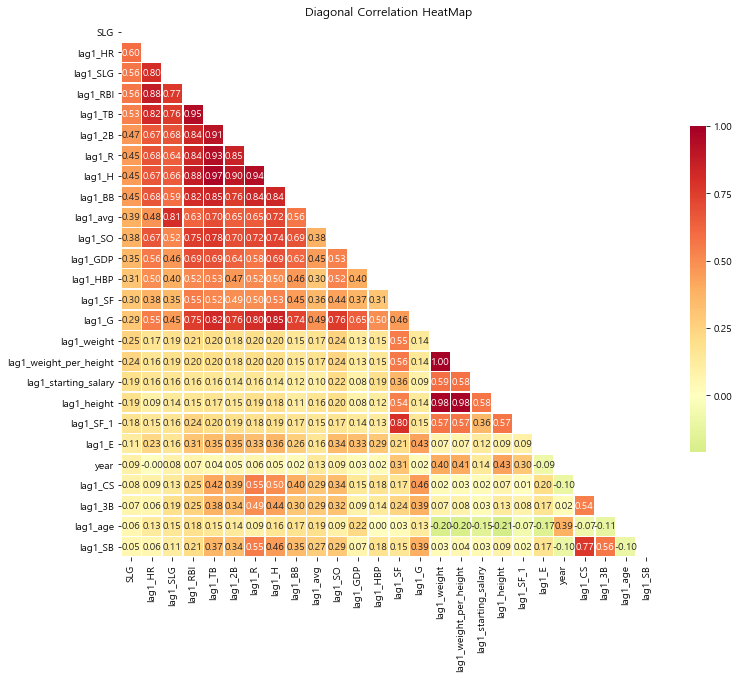

In [51]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','OBP'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB']>=30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace=True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [55]:
# day_by_day 데이터에서 연도별로 선수의 시즌 전반기 출루율과 관련된 성적 합을 구함
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name', 'year'])[['AB', 'H', 'BB', 'HBP']].sum().reset_index()
# day_by_day와 regular_season_df_SF에서 구한 희생 플라이 관련 데이터를 합침
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how='left',
                                    on=['batter_name', 'year'])

# 선수별 전반기 희생 플라이 수를 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1'] * sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis=1, inplace=True)

# 선수별 전반기 OBP(출루율)을 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis=1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP', 'SF']].sum(axis=1)

# OBP 결측치를 0으로 처리
sum_hf_yr_OBP['OBP'].fillna(0, inplace=True)

# 분석에 필요하지 않은 열을 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name', 'year', 'AB', 'OBP']]

In [62]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','2B','3B', 'HR'].sum().reset_index()

# 전반기 장타율 계산
sum_hf_yr_SLG['SLG'] = \
    (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis=1) +
     sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4
     ) / sum_hf_yr_SLG['AB']

# SLG 결측치를 0으로 처리 
sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

# 필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name','year','age']],
                                    how='left', on=['batter_name','year'])
sum_hf_yr_SLG.head()

C:\Users\lisa5\AppData\Local\Temp\ipykernel_12836\2555536603.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(


KeyError: "['age'] not in index"

In [63]:
# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 1)   # 1년 전 SLG 변수 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 2)   # 2년 전 SLG 변수 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 3)   # 3년 전 SLG 변수 생성

# 생성된 변수의 결측치 비율을 확인
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum() / \
      sum_hf_yr_SLG.shape[0], 2)   # 각 변수의 결측치 비율을 소수점 2자리까지 출력

lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

In [54]:
# 선수별 SLG 평균 데이터(player_SLG_mean) 생성
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = \
    (player_SLG_mean['H'] - player_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
     player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4
    ) / player_SLG_mean['AB']

# 시즌별 SLG 평균 데이터(season_SLG_mean) 생성
season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = \
    (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) + 
     season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4
    ) / season_SLG_mean['AB']

# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']],
                                    how='left', on="batter_name")

# 선수 평균의 성적이 결측치이면 데이터에서 제거
sum_hf_yr_SLG = \
    sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

# 결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 1, season_SLG_mean) #1년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 2, season_SLG_mean) #2년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 3, season_SLG_mean) #3년전 성적 대체

display(sum_hf_yr_SLG.head())
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,19,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24,0.333333,0.389415,0.362931,0.332527


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

## 1.4. 모델링
### 1.4.1. 데이터 분할

In [64]:
# 30타수 이상의 데이터만 학습용 데이터로 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB'] >= 30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB'] >= 30]

# 2018년 데이터를 테스트 데이터로, 2018년 이전은 훈련 데이터로 분할
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]

# 데이터 크기 출력
print(OBP_train.shape, OBP_test.shape, SLG_train.shape, SLG_test.shape)

(872, 4) (150, 4) (872, 7) (150, 7)


In [65]:
def wrmse(v,w,p):  # Weighted Root Mean Square Error 계산 함수 
    # v: 실제값
    # w: 타수
    # p: 예측값
    return sum(np.sqrt(((v-p)**2 * w) / sum(w)))
# Weighted Root Mean Square Error(WRMSE)를 계산합니다. 
# 예측값과 실제값 간의 차이를 가중 평균하여 모델의 성능을 측정하는 지표 
# 가중치는 각 데이터 포인트의 중요성을 나타내며, 이 함수는 가중치를 고려하여 오차를 계산하고 제곱근을 취하여 최종 WRMS 값을 반환함 
# 이 값이 낮을수록 모델의 성능이 더 우수함

### 1.4.2. 모델 선택

In [ ]:
---------------------------

In [57]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다
#  Lasso와 Ridge 모델의 하이퍼파라미터 alpha 값을 탐색하기 위한 범위를 지정
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)} 

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    #  Lasso 회귀 모델을 GridSearchCV를 사용하여 최적의 alpha 값으로 훈련
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}
     # Lasso 회귀 모델을 GridSearchCV를 사용하여 최적의 alpha 값으로 훈련

# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다
SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(),param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,}
# Lasso와 Ridge 모델을 GridSearchCV를 사용하여 최적의 alpha 값으로 훈련시키고, 
# 각 모델은 SLG_train 데이터의 마지막 5개 열을 독립 변수로 사용하고 'SLG'를 예측하는 데 사용

In [58]:
import time  # 시간측정을 위해 time 모듈을 가져옴
from sklearn.ensemble import RandomForestRegressor 
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,100,150,200,300,500,1000],   # 트리의 개수
    'max_features': ['auto', 'sqrt'],   # 각 노드에서 고려할 최대 특성 개수
    'max_depth' : [1,2,3,5,6,10],  # 트리의 최대 깊이
    'min_samples_leaf': [1, 2, 4],  리프 노드에서 허용되는 최소 샘플 수
    'min_samples_split': [2, 3, 5, 10]}  # 노드를 분할하기 위한 최소한의 샘플 수

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
OBP_RF_models = {   # 딕셔너리: OBP(On-Base Percentage)를 예측하기 위한 랜덤 포레스트 회귀 모델을 저장
    'RF': GridSearchCV( # 랜덤 포레스트 회귀 모델을 GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합으로 훈련시킴
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_}
# OBP_train 데이터의 마지막 5개 열을 독립 변수로 사용하고, 'OBP'를 예측합니다. 
# 최적의 모델은 .best_estimator_를 통해 얻어짐
# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_}

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)
# 코드 실행 시간을 측정하여 출력

걸린시간 : 1463.772초


In [59]:
import xgboost as xgb 
start = time.time() # 시작 시간 저장

# xgboost parmeter space를 정의한다.
XGB_params = {
    'min_child_weight': [1,3, 5,10],  #리프 노드에서 필요한 최소한의 샘플 수
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],   # 트리 노드의 분할에 필요한 최소 손실 감소
    'subsample': [0.6, 0.8, 1.0],       # 각 트리를 훈련하기 위해 사용하는 데이터의 샘플 비율
    'colsample_bytree': [0.6, 0.8, 1.0],    # 각 트리를 훈련하기 위해 사용하는 특성(feature)의 비율
    'max_depth': [3, 4, 5,7,10]}   # 트리의 최대 깊이
# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),  #  XGBoost 회귀 모델을 생성하고, random_state를 설정하여 재현성을 보장
    param_grid=XGB_params, n_jobs=-1)  # 그리드 탐색을 위해 정의한 하이퍼파라미터 공간을 사용

XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1)

# 모델 학습
XGB_OBP_gridsearch.fit(OBP_train.iloc[:,-5:], OBP_train['OBP'])
XGB_SLG_gridsearch.fit(SLG_train.iloc[:,-5:], SLG_train['SLG'])

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

[20:14:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
걸린시간 : 341.191초


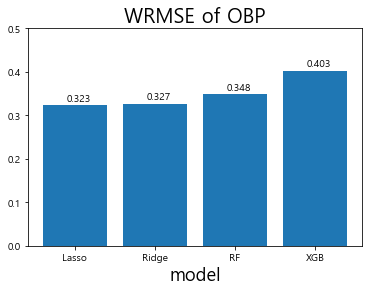

In [60]:
# 테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:,-5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:,-5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:,-5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])
# 선택한 모델을 사용하여 테스트 데이터셋인 OBP_test의 마지막 5개 열을 독립 변수로 사용하여 OBP를 예측

# test 데이터의 WRMSE 계산
wrmse_score = [wrmse(OBP_test['OBP'], OBP_test['AB'], Lasso_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], Ridge_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], RF_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], XGB_OBP)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']  # x축에 표시한 모델 이름

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
    
plt.show()

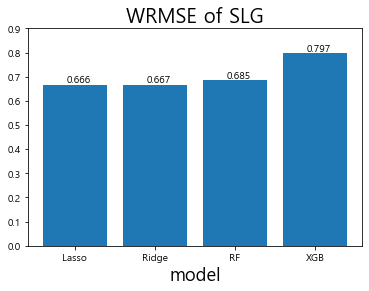

In [61]:
# 테스트 데이터셋(2018년)의 선수들의 SLG를 예측
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:,-5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:,-5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:,-5:])

# test데이터 WRMSE 계산
wrmse_score_SLG = [wrmse(SLG_test['SLG'], SLG_test['AB'], Lasso_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], Ridge_SLG), 
                   wrmse(SLG_test['SLG'], SLG_test['AB'], RF_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score_SLG)
plt.title('WRMSE of SLG', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0, 0.9)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score_SLG):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
plt.show()

### 1.4.3. 결과 해석과 평가

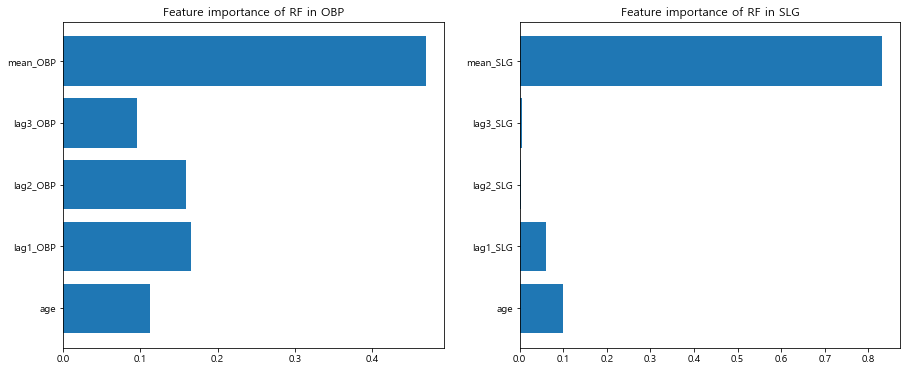

In [62]:
plt.figure(figsize=(15,6)) # 그래프의 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1,1) 그래프

#가로막대 그래프
plt.barh(OBP_train.iloc[:,-5:].columns,OBP_RF_models['RF'].feature_importances_) 
# 첫 번째 서브플롯에는 OBP_train 데이터의 마지막 5개 열의 열 이름을 가로막대 그래프로 표시

plt.title('Feature importance of RF in OBP')
plt.subplot(1,2,2) # 1행 2열의 두번째(1,2) 그래프
plt.barh(SLG_train.iloc[:,-5:].columns,SLG_RF_models['RF'].feature_importances_)
plt.title('Feature importance of RF in SLG')
plt.show()

In [63]:
# Lasso에서 GridSearchCV로 탐색한 최적의 alpha값 출력
print('Alpha : ', OBP_linear_models['Lasso'].alpha) 
# Lasso model의 선형 계수 값 출력
display(pd.DataFrame(OBP_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=OBP_train.iloc[:,-5:].columns, index = ['coefficient']))

print('Alpha : ', SLG_linear_models['Lasso'].alpha)
display(pd.DataFrame(SLG_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=SLG_train.iloc[:,-5:].columns, index = ['coefficient']))

Alpha :  0.0001


,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
coefficient,0.003195,0.018249,0.0,0.0,0.864913


Alpha :  0.0001


,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
coefficient,0.0049,0.081209,0.0,-0.0,0.836453


..

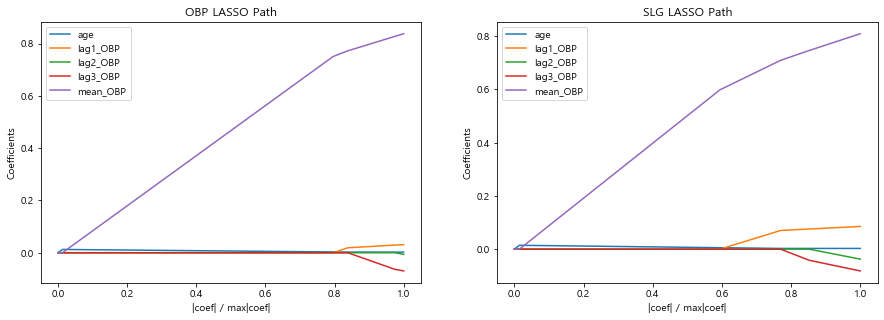

In [64]:
from sklearn.linear_model import lars_path
plt.figure(figsize=(15,4.8)) # 그래프 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프 

# OBP 모델의 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(OBP_train.iloc[:,-5:].values, OBP_train['OBP'],
                             method='lasso', verbose=True)

# 피처별 alpha 값에 따른 선형 모델 계수의 절댓값의 합 
xx = np.sum(np.abs(coefs.T), axis=1)
# 계수의 절댓값 중 가장 큰 값으로 alpha에 따른 피처의 계수의 합을 나눈다. 
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('OBP LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
# SLG 모델에서 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(SLG_train.iloc[:,-5:].values, SLG_train['SLG'],
                             method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('SLG LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)
plt.show()

## 1.5. 성능 향상을 위한 방법
### 1.5.1. 앙상블

In [65]:
# OBP 모델 앙상블 결과를 출력하고, 가중 평균 제곱근 오차(WRMSE)를 계산
print('OBP model averaging: ',
      wrmse(OBP_test['OBP'], OBP_test['AB'], (Lasso_OBP + RF_OBP) / 2))

# SLG 모델 앙상블 결과를 출력하고, 가중 평균 제곱근 오차(WRMSE)를 계산
print('SLG model averaging: ',
      wrmse(SLG_test['SLG'], OBP_test['AB'], (Lasso_SLG + RF_SLG) / 2))

OBP model averaging:  0.3324574652010582
SLG model averaging:  0.6684541138633259


### 1.5.2. 단순화된 모델 생성

In [66]:
# 전처리된 데이터를 다른 곳에 저장
sum_hf_yr_OBP_origin = sum_hf_yr_OBP.copy()

# 전체 희생타 계산
regular_season_df['SF'] = \
    regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] - \
    regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

# 한 타수당 평균 희생타 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]

#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기 + BB, RBI 추가
sum_hf_yr_OBP = \
    day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])[
    'AB','H','BB','HBP','RBI', '2B', '3B', 'HR'].sum().reset_index()
#day_by_day와 regular season에서 구한 희생타 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

# 한 타수당 평균 희생타 계산
sum_hf_yr_OBP['SF'] = \
    (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(lambda x: round(x,0))
sum_hf_yr_OBP.drop('SF_1',axis = 1, inplace = True)

# 전반기 OBP(출루율 계산)
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# TB 계산
sum_hf_yr_OBP['TB'] =  sum_hf_yr_OBP['H'] + sum_hf_yr_OBP['2B']*2 + \
                       sum_hf_yr_OBP['3B']*3 + sum_hf_yr_OBP['HR']*4
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP', 'BB', 'TB', 'RBI']]

# 나이 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 평균 OBP 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = \
    sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [67]:
# 각 변수에 대한 1년 전 성적 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "BB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "TB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "RBI", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)

sum_hf_yr_OBP = sum_hf_yr_OBP.dropna() # 결측치 포함한 행 제거

# 변수 리스트 지정
feature_list_1 = ['age', 'lag1_OBP', 'mean_OBP']
feature_list_2 = ['age', 'lag1_BB', 'lag1_TB', 'lag1_RBI','lag1_OBP', 'mean_OBP']

In [68]:
# 학습시킬 데이터 30타수 이상만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30] 

# 2018년 test로 나누고 나머지는 학습
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

# grid search를 이용해 학습한다.
OBP_RF_models_1 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_1], OBP_train['OBP']).best_estimator_}

OBP_RF_models_2 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_2], OBP_train['OBP']).best_estimator_}

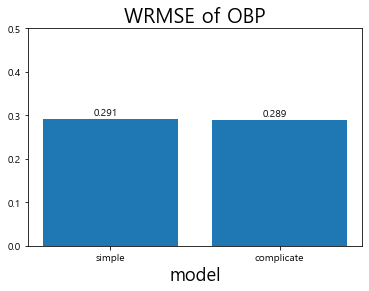

In [69]:
# 예측
RF_OBP_1 = OBP_RF_models_1['RF'].predict(OBP_test.loc[:,feature_list_1])
RF_OBP_2 = OBP_RF_models_2['RF'].predict(OBP_test.loc[:,feature_list_2])

# wrmse 계산
wrmse_score = [wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_1) ,
               wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_2)]
x_lab = ['simple', 'complicate']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)
# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y좌표, 텍스트 표시
plt.show()

In [70]:
# 최종 제출을 위한 원래 데이터 복구 
sum_hf_yr_OBP = sum_hf_yr_OBP_origin.copy()

### 1.5.3. 테스트 데이터 정제

In [67]:
submission = pd.read_csv('C:/dacon/ch01/dataset/submission.csv')
submission['year'] = 2019 # 연도 기입

# 2019년의 Age(나이) 계산
batter_year_born = regular_season_df[['batter_id','batter_name','year_born']].copy()
# 중복선수 제거
batter_year_born = batter_year_born.drop_duplicates().reset_index(drop=True) 

submission = submission.merge(batter_year_born, how='left',
                              on=['batter_id', 'batter_name'])
submission['age'] = submission['year'] - \
                    submission['year_born'].apply(lambda x: int(x[:4]))
submission.head()

,batter_id,batter_name,year,year_born,age
0,1,강경학,2019,1992년 08월 11일,27
1,2,강구성,2019,1993년 06월 09일,26
2,3,강민국,2019,1992년 01월 10일,27
3,4,강민호,2019,1985년 08월 18일,34
4,5,강백호,2019,1999년 07월 29일,20


In [68]:
# submission OBP, SLG 파일 2개 만들어 합치기 
submission_OBP = submission.copy()
submission_SLG = submission.copy()

In [69]:
# 앞서 전처리한 데이터를 이용해 평균 성적 기입
submission_OBP = submission_OBP.merge(
    sum_hf_yr_OBP[['batter_name','mean_OBP']].drop_duplicates().reset_index(drop=True),
    how = 'left', on ='batter_name')

# 앞서 전처리한 데이터를 이용해 과거 성적 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_OBP.loc[
        (sum_hf_yr_OBP['year'] == (2019 - i)) &
        (sum_hf_yr_OBP['AB']>=30),['batter_name','OBP']].copy()
    temp_lag_df.rename(columns={'OBP':'lag'+str(i)+'_OBP'}, inplace=True)
    submission_OBP = submission_OBP.merge(temp_lag_df, how='left', on='batter_name')

submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,NaN,NaN,NaN,NaN
2,3,강민국,2019,1992년 01월 10일,27,NaN,NaN,NaN,NaN
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,NaN,NaN


In [70]:
submission_OBP['batter_name'].loc[submission_OBP['mean_OBP'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

In [71]:
for batter_name in ["김주찬", "이범호"]:
     # 30타수 이상인 해당선수의 인덱스(Boolean)
    cond_regular = (regular_season_df['AB'] >= 30) & \
                   (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 평균 OBP 계산
    mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * \
                   regular_season_df.loc[cond_regular,'OBP']) / \
               sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] = \
        mean_OBP
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_OBP['batter_name'] == batter_name
    submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2018),'OBP'].values
    submission_OBP.loc[cond_sub,'lag2_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2017),'OBP'].values
    submission_OBP.loc[cond_sub,'lag3_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2016),'OBP'].values

In [72]:
for i in np.where(submission_OBP['batter_name'].isin(["고명성","전민재","김철호","신범수","이병휘"])):
    #submission_OBP.loc[i,'mean_OBP'] = season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP'].values
    submission_OBP.loc[i,'mean_OBP'] = \
        season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP']

In [73]:
for batter_name in ["전병우","샌즈"]:
    # 30 타수 이상인 해당 선수의 index 추출
    cond_regular = (regular_season_df['AB']>=30) & \
                   (regular_season_df['batter_name']==batter_name) 

# 타수를 고려해 선수의 평균 OBP계산
mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * \
               regular_season_df.loc[cond_regular,'OBP']) / \
           sum(regular_season_df.loc[cond_regular,'AB'])
    
submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] = mean_OBP

cond_sub = submission_OBP['batter_name'] == batter_name

# 2018년 데이터로부터 2019년의 1년 전 성적 기입
submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
    (cond_regular)&(regular_season_df['year']==2018),'OBP'].values

In [74]:
# 평균 성적이 결측치인 선수들에 대해 평균 OBP의 하위 25% 성적 기입
submission_OBP.loc[submission_OBP['mean_OBP'].isna(),'mean_OBP'] = \
    np.quantile(player_OBP_mean['mean_OBP'],0.25)

In [75]:
for i in [1,2,3]: 
    # i년 전 OBP 결측치 제거
    submission_OBP = lag_na_fill(submission_OBP, 'OBP', i, season_OBP_mean)
submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.304124,0.329991,0.330297,0.336224
2,3,강민국,2019,1992년 01월 10일,27,0.304124,0.329991,0.330297,0.336224
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,0.356317,0.362245


In [76]:
# 앞서 전처리한 데이터로 평균 SLG 값 기입
submission_SLG = submission_SLG.merge(
    sum_hf_yr_SLG[['batter_name','mean_SLG']].drop_duplicates().reset_index(drop=True),
    how='left', on='batter_name')

# 앞서 전처리한 데이터에서 과거 SLG 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_SLG.loc[(sum_hf_yr_SLG['year'] == (2019 - i)) &
        (sum_hf_yr_SLG['AB']>=30),['batter_name','SLG']].copy()
    
    temp_lag_df.rename(columns={'SLG':'lag'+str(i)+'_SLG'}, inplace=True)
    
    submission_SLG = submission_SLG.merge(temp_lag_df, how='left', on='batter_name')

In [77]:
submission_SLG['batter_name'].loc[submission_SLG['mean_SLG'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

In [78]:
for batter_name in ["김주찬", "이범호"]:
     # mean_SLG 계산
    cond_regular = (regular_season_df['AB'] >= 30) & \
                   (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 선수의 평균 SLG 계산
    mean_SLG = sum(regular_season_df.loc[cond_regular,'AB'] * \
                   regular_season_df.loc[cond_regular,'SLG']) / \
               sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_SLG.loc[(submission_SLG['batter_name'] == batter_name), 'mean_SLG'] = \
        mean_SLG
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_SLG['batter_name'] == batter_name
    
    submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2018),'SLG'].values
    submission_SLG.loc[cond_sub,'lag2_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2017),'SLG'].values
    submission_SLG.loc[cond_sub,'lag3_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2016),'SLG'].values

In [79]:
for i in np.where(submission_SLG['batter_name'].isin(
    ["고명성","전민재","김철호","신범수","이병휘"])):
     # 위의 해당 선수들의 평균 SLG 평균값으로 대체
    #submission_SLG.loc[i,'mean_SLG'] = season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG'].values
    submission_SLG.loc[i,'mean_SLG'] = \
        season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG']

In [80]:
for batter_name in ["전병우","샌즈"]:
    
    # 30타수 이상인 해당선수의 인덱스(Boolean) 
    cond_regular = (regular_season_df['AB']>=30)&\
(regular_season_df['batter_name']==batter_name)

# 타수를 고려한 평균 SLG 계산
mean_SLG = sum(regular_season_df.loc[cond_regular,'AB']*
regular_season_df.loc[cond_regular,'SLG']) / sum(regular_season_df.loc[cond_regular,'AB'])

# 해당 선수의 평균 SLG 값 기입
submission_SLG.loc[(submission_SLG['batter_name'] == batter_name),
'mean_SLG'] = mean_SLG

# 해당 선수의 1년 전 SLG값 기입
cond_sub = submission_SLG['batter_name'] == batter_name
submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[(cond_regular)&
(regular_season_df['year']==2018),'SLG'].values

In [81]:
# 평균 성적이 결측치인 선수들에 대해 평균 SLG의 하위 25% 성적 기입
submission_SLG.loc[submission_SLG['mean_SLG'].isna(),'mean_SLG'] = \
    np.quantile(player_SLG_mean['mean_SLG'],0.25)

In [82]:
for i in [1,2,3]:
    # i년 전 SLG 성적 결측치 처리
    submission_SLG = lag_na_fill(submission_SLG, 'SLG', i, season_SLG_mean)
submission_SLG.head()

,batter_id,batter_name,year,year_born,age,mean_SLG,lag1_SLG,lag2_SLG,lag3_SLG
0,1,강경학,2019,1992년 08월 11일,27,0.332527,0.523810,0.256098,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.326923,0.391429,0.385754,0.385397
2,3,강민국,2019,1992년 01월 10일,27,0.326923,0.391429,0.385754,0.385397
3,4,강민호,2019,1985년 08월 18일,34,0.466540,0.487273,0.548736,0.577689
4,5,강백호,2019,1999년 07월 29일,20,0.523719,0.532051,0.484152,0.483795


In [83]:
# Random Forests를 이용해 OBP 예측
predict_OBP = OBP_RF_models['RF'].predict(submission_OBP.iloc[:,-5:]) 
# Lasso를 이용해 SLG 예측
predict_SLG = SLG_linear_models ['Lasso'].predict(submission_SLG.iloc[:,-5:])

In [84]:
final_submission = submission[['batter_id','batter_name']]
final_submission['OPS'] = predict_SLG + predict_OBP # OBP + SLG = OPS 
final_submission.head(10)

<ipython-input-84-400b298e7ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['OPS'] = predict_SLG + predict_OBP # OBP + SLG = OPS


,batter_id,batter_name,OPS
0,1,강경학,0.503957
1,2,강구성,0.687933
2,3,강민국,0.696609
3,4,강민호,0.958395
4,5,강백호,0.751592
5,8,강상원,0.661807
6,9,강승호,0.505642
7,11,강진성,0.656007
8,12,강한울,0.672859
9,16,고명성,0.640507


### 1.5.4. 반발계수의 변화

In [85]:
# 시즌별 전체 OBP 계산(30타수 이상인 선수들의 기록만 이용)
season_OBP = \
    regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', 'BB':'sum', 'HBP':'sum', 'SF':'sum'}).reset_index()

season_OBP['OBP'] = season_OBP[['H','BB','HBP']].sum(axis=1) / \
                    season_OBP[['AB','BB','HBP','SF']].sum(axis=1)

# 시즌별 전체 SLG 계산(30타수 이상인 선수들의 기록만 이용)
season_SLG = \
    regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', '2B':'sum', '3B':'sum', 'HR':'sum'}).reset_index()

season_SLG['SLG'] = ((season_SLG['H'] - season_SLG[['2B','3B','HR']].sum(axis=1)) + \
                     season_SLG['2B']*2+season_SLG['3B']*3+ season_SLG['HR']*4) / \
                    season_SLG['AB']

# season_OBP와 season_SLG를 병합 후 season_OPS를 생성해 OPS 계산
season_OPS = pd.merge(season_OBP[['year','OBP']],season_SLG[['year', 'SLG']], on = 'year')
season_OPS['OPS'] = season_OPS['OBP'] + season_OPS['SLG']

# 시즌별 전체 홈런 수와 한 선수당 평균 홈런 수 계산
season_HR = regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
    {'HR':['sum','mean','count']}).reset_index()
season_HR.columns = ['year', 'sum_HR', 'mean_HR', 'count']

# 기존의 OPS 데이터셋과 병합
season_OPS = season_OPS.merge(season_HR,on ='year' ,how='left')
display(season_OPS.tail())

,year,OBP,SLG,OPS,sum_HR,mean_HR,count
21,2014,0.368970,0.446302,0.815272,1013,7.235714,140
22,2015,0.362742,0.434129,0.796871,1222,7.685535,159
23,2016,0.368325,0.443871,0.812196,1267,7.918750,160
24,2017,0.356469,0.444584,0.801053,1450,8.285714,175
25,2018,0.355858,0.455936,0.811794,1726,9.806818,176


In [86]:
#2018년의 평균 홈런 개수를 시즌별 평균 홈런 수에서 뺀다(HR_diff)
season_OPS['HR_diff'] = season_OPS['mean_HR'] - season_OPS['mean_HR'].iloc[-1]
difference = season_OPS.sort_values(by = 'HR_diff')[['year','OPS','HR_diff']]
display(difference.reset_index(drop=True).head(12))

,year,OPS,HR_diff
0,2012,0.703301,-5.799242
1,2013,0.748820,-4.891325
2,2006,0.709301,-4.806818
3,2008,0.741542,-4.671987
4,2011,0.735087,-4.564883
5,2007,0.730715,-4.451555
6,2005,0.740615,-3.543660
7,2010,0.770265,-2.623332
8,2014,0.815272,-2.571104
9,2004,0.751737,-2.500696


In [87]:
# 2000년도 이전의 데이터 수가 충분치 않아 고려하지 않는다.
season_OPS.loc[season_OPS['year']>2000]

,year,OBP,SLG,OPS,sum_HR,mean_HR,count,HR_diff
8,2001,0.366585,0.454593,0.821178,199,7.653846,26,-2.152972
9,2002,0.343798,0.424739,0.768536,274,8.838710,31,-0.968109
10,2003,0.353936,0.427291,0.781227,301,7.717949,39,-2.088869
11,2004,0.344181,0.407556,0.751737,358,7.306122,49,-2.500696
12,2005,0.344851,0.395764,0.740615,357,6.263158,57,-3.543660
13,2006,0.334390,0.374912,0.709301,345,5.000000,69,-4.806818
14,2007,0.346222,0.384493,0.730715,407,5.355263,76,-4.451555
15,2008,0.350637,0.390905,0.741542,457,5.134831,89,-4.671987
16,2009,0.359326,0.429237,0.788563,806,8.141414,99,-1.665404
17,2010,0.356988,0.413278,0.770265,783,7.183486,109,-2.623332


In [88]:
final_submission['OPS'] = final_submission['OPS'] - 0.038
display(final_submission.head(10))
final_submission.to_csv('submission.csv', index=False) # 최종 제출파일 생성

<ipython-input-88-db27b64caf8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['OPS'] = final_submission['OPS'] - 0.038


,batter_id,batter_name,OPS
0,1,강경학,0.465957
1,2,강구성,0.649933
2,3,강민국,0.658609
3,4,강민호,0.920395
4,5,강백호,0.713592
5,8,강상원,0.623807
6,9,강승호,0.467642
7,11,강진성,0.618007
8,12,강한울,0.634859
9,16,고명성,0.602507
